# Project based on Toronto Police Services Cyclists Incidents Data

#### Group 1
Hima Mohandas, Elna Kattoor, Mackenzie Habash, Crescent Faruq, Ali Qureshi 


# Business Problem/Business Understanding

To serve and protect is the motto of our client - Toronto Police Services (TPS) - and their mission is to serve and protect efficiently and effectively as possible by reducing accidents and injuries involving cyclists sharing the road, which means having:

(1) Fewer violations such as drinking and driving/riding, reckless driving/riding and to improve traffic conditions, road conditions, traffic controls etc.

(2) Minimizing expenses in budgetary terms by using up of resources such as manpower, equipment and inventory of services.



# Business Deliverables

Identifying the segments of factors leading to the severity of the crashes and to sustain their mission "To serve and protect", which means enabling:

(1) Measures to help reduce accidents and violations involving cyclists.
(2) Minimizing expenses & optimization of resource allocation.



# Analytical Framing 

Select features from data understanding and use those features to form PCA Analysis and K-Means Clustering approach/algorithm  to find the most important segments leading to severity of injury.



In [1]:
import os 
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
from math import sqrt

from sklearn.cluster import KMeans, k_means

%matplotlib inline



# To change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(8,6)})


In [2]:
# Import data
cyclists = pd.read_csv('Cyclists.csv')

In [3]:
# print the shape
print(cyclists.shape)

pd.set_option('display.max_columns', None)
cyclists.head(10)

(1681, 56)


X             Y   Index_  ACCNUM  YEAR                    DATE  \
0 -8.830573e+06  5.427258e+06  3383485  891027  2006  2006/02/11 05:00:00+00   
1 -8.830573e+06  5.427258e+06  3383486  891027  2006  2006/02/11 05:00:00+00   
2 -8.815044e+06  5.430017e+06  3390109  893580  2006  2006/02/27 05:00:00+00   
3 -8.815044e+06  5.430017e+06  3390110  893580  2006  2006/02/27 05:00:00+00   
4 -8.815044e+06  5.430017e+06  3390111  893580  2006  2006/02/27 05:00:00+00   
5 -8.833512e+06  5.417385e+06  3391770  894195  2006  2006/03/01 05:00:00+00   
6 -8.833512e+06  5.417385e+06  3391771  894195  2006  2006/03/01 05:00:00+00   
7 -8.837086e+06  5.412752e+06  3406944  899910  2006  2006/04/06 04:00:00+00   
8 -8.837086e+06  5.412752e+06  3406945  899910  2006  2006/04/06 04:00:00+00   
9 -8.840080e+06  5.421142e+06  3402767  898340  2006  2006/04/20 04:00:00+00   

   TIME  HOUR          STREET1         STREET2 OFFSET      ROAD_CLASS  \
0  1804    18     UNDERHILL DR  CASSANDRA BLVD    NaN       Collector   
1  1804    18     UNDERHILL DR  CASSANDRA BLVD    NaN       Collector   
2  1955    19  MORNINGSIDE AVE     KINGSTON RD    NaN  Major Arterial   
3  1955    19  MORNINGSIDE AVE     KINGSTON RD    NaN  Major Arterial   
4  1955    19  MORNINGSIDE AVE     KINGSTON RD    NaN  Major Arterial   
5  1110    11      COSBURN AVE       LOGAN AVE    NaN  Minor Arterial   
6  1110    11      COSBURN AVE       LOGAN AVE    NaN  Minor Arterial   
7  1540    15           BAY ST    GERRARD ST W    NaN  Major Arterial   
8  1540    15           BAY ST    GERRARD ST W    NaN  Major Arterial   
9   843     8        AVENUE RD  CORTLEIGH BLVD    NaN  Major Arterial   

                District  WardNum  Division   LATITUDE  LONGITUDE  \
0             North York     16.0        33  43.752745  -79.32639   
1             North York     16.0        33  43.752745  -79.32639   
2            Scarborough      NaN        43  43.770645  -79.18689   
3            Scarborough      NaN        43  43.770645  -79.18689   
4            Scarborough      NaN        43  43.770645  -79.18689   
5  Toronto and East York     14.0        54  43.688645  -79.35279   
6  Toronto and East York     14.0        54  43.688645  -79.35279   
7  Toronto and East York     11.0        52  43.658545  -79.38489   
8  Toronto and East York     11.0        52  43.658545  -79.38489   
9             North York      8.0        53  43.713045  -79.41179   

       LOCCOORD           ACCLOC        TRAFFCTL VISIBILITY     LIGHT  \
0  Intersection  At Intersection      No Control      Clear      Dark   
1  Intersection  At Intersection      No Control      Clear      Dark   
2  Intersection              NaN  Traffic Signal      Clear      Dark   
3  Intersection              NaN  Traffic Signal      Clear      Dark   
4  Intersection              NaN  Traffic Signal      Clear      Dark   
5     Mid-Block              NaN      No Control      Clear  Daylight   
6     Mid-Block              NaN      No Control      Clear  Daylight   
7  Intersection  At Intersection  Traffic Signal      Clear  Daylight   
8  Intersection  At Intersection  Traffic Signal      Clear  Daylight   
9  Intersection  At Intersection      No Control      Clear  Daylight   

  RDSFCOND           ACCLASS           IMPACTYPE        INVTYPE    INVAGE  \
0      Dry  Non-Fatal Injury  Cyclist Collisions         Driver  65 to 69   
1      Dry  Non-Fatal Injury  Cyclist Collisions        Cyclist  20 to 24   
2      Wet  Non-Fatal Injury  Cyclist Collisions  Vehicle Owner   unknown   
3      Wet  Non-Fatal Injury  Cyclist Collisions         Driver  35 to 39   
4      Wet  Non-Fatal Injury  Cyclist Collisions        Cyclist  25 to 29   
5      Dry  Non-Fatal Injury  Cyclist Collisions         Driver  35 to 39   
6      Dry  Non-Fatal Injury  Cyclist Collisions        Cyclist  80 to 84   
7      Dry  Non-Fatal Injury  Cyclist Collisions         Driver  45 to 49   
8      Dry  Non-Fatal Injury  Cyclist Collisions        Cyclist  25 to 2

In [4]:
# Checking null values

cyclists.isnull().sum()

X                   0
Y                   0
Index_              0
ACCNUM              0
YEAR                0
DATE                0
TIME                0
HOUR                0
STREET1             0
STREET2           150
OFFSET           1460
ROAD_CLASS          0
District            2
WardNum           221
Division            0
LATITUDE            0
LONGITUDE           0
LOCCOORD           10
ACCLOC            494
TRAFFCTL            0
VISIBILITY          0
LIGHT               0
RDSFCOND            0
ACCLASS             0
IMPACTYPE           0
INVTYPE             0
INVAGE              0
INJURY            150
FATAL_NO         1650
INITDIR           254
VEHTYPE           105
MANOEUVER         261
DRIVACT           961
DRIVCOND          963
PEDTYPE          1665
PEDACT           1665
PEDCOND          1665
CYCLISTYPE       1040
CYCACT           1015
CYCCOND          1016
PEDESTRIAN       1648
CYCLIST             0
AUTOMOBILE        262
MOTORCYCLE       1675
TRUCK            1566
TRSN_CITY_

In [5]:
# Filling null values

cyclists['ALCOHOL'] = cyclists['ALCOHOL'].fillna('No')
cyclists['SPEEDING'] = cyclists['SPEEDING'].fillna('No')
cyclists['REDLIGHT'] = cyclists['REDLIGHT'].fillna('No')
cyclists['AUTOMOBILE'] = cyclists['AUTOMOBILE'].fillna('No')
cyclists['MOTORCYCLE'] = cyclists['MOTORCYCLE'].fillna('No')
cyclists['TRUCK'] = cyclists['TRUCK'].fillna('No')
cyclists['TRSN_CITY_VEH'] = cyclists['TRSN_CITY_VEH'].fillna('No')
cyclists['EMERG_VEH'] = cyclists['EMERG_VEH'].fillna('No')
cyclists['PASSENGER'] = cyclists['PASSENGER'].fillna('No')
cyclists['PEDESTRIAN'] = cyclists['PEDESTRIAN'].fillna('No')
cyclists['SPEEDING'] = cyclists['SPEEDING'].fillna('No')
cyclists['AG_DRIV'] = cyclists['AG_DRIV'].fillna('No')

cyclists = cyclists.fillna(cyclists['INJURY'].value_counts().index[0])

In [6]:
# Checking null values

cyclists.isnull().sum()

X                0
Y                0
Index_           0
ACCNUM           0
YEAR             0
DATE             0
TIME             0
HOUR             0
STREET1          0
STREET2          0
OFFSET           0
ROAD_CLASS       0
District         0
WardNum          0
Division         0
LATITUDE         0
LONGITUDE        0
LOCCOORD         0
ACCLOC           0
TRAFFCTL         0
VISIBILITY       0
LIGHT            0
RDSFCOND         0
ACCLASS          0
IMPACTYPE        0
INVTYPE          0
INVAGE           0
INJURY           0
FATAL_NO         0
INITDIR          0
VEHTYPE          0
MANOEUVER        0
DRIVACT          0
DRIVCOND         0
PEDTYPE          0
PEDACT           0
PEDCOND          0
CYCLISTYPE       0
CYCACT           0
CYCCOND          0
PEDESTRIAN       0
CYCLIST          0
AUTOMOBILE       0
MOTORCYCLE       0
TRUCK            0
TRSN_CITY_VEH    0
EMERG_VEH        0
PASSENGER        0
SPEEDING         0
AG_DRIV          0
REDLIGHT         0
ALCOHOL          0
DISABILITY  

In [7]:

# Analyzing what columns we need to put as features

cyclists.columns

Index(['X', 'Y', 'Index_', 'ACCNUM', 'YEAR', 'DATE', 'TIME', 'HOUR', 'STREET1',
       'STREET2', 'OFFSET', 'ROAD_CLASS', 'District', 'WardNum', 'Division',
       'LATITUDE', 'LONGITUDE', 'LOCCOORD', 'ACCLOC', 'TRAFFCTL', 'VISIBILITY',
       'LIGHT', 'RDSFCOND', 'ACCLASS', 'IMPACTYPE', 'INVTYPE', 'INVAGE',
       'INJURY', 'FATAL_NO', 'INITDIR', 'VEHTYPE', 'MANOEUVER', 'DRIVACT',
       'DRIVCOND', 'PEDTYPE', 'PEDACT', 'PEDCOND', 'CYCLISTYPE', 'CYCACT',
       'CYCCOND', 'PEDESTRIAN', 'CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK',
       'TRSN_CITY_VEH', 'EMERG_VEH', 'PASSENGER', 'SPEEDING', 'AG_DRIV',
       'REDLIGHT', 'ALCOHOL', 'DISABILITY', 'Hood_ID', 'Neighbourhood',
       'ObjectId'],
      dtype='object')

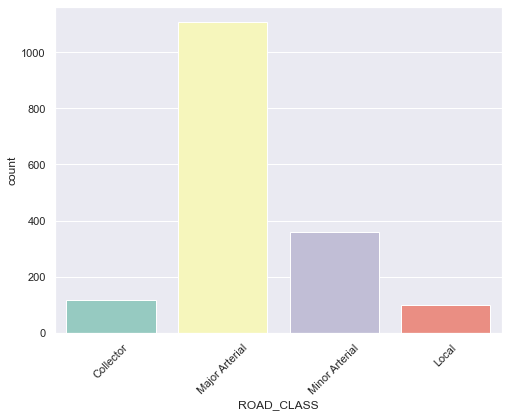

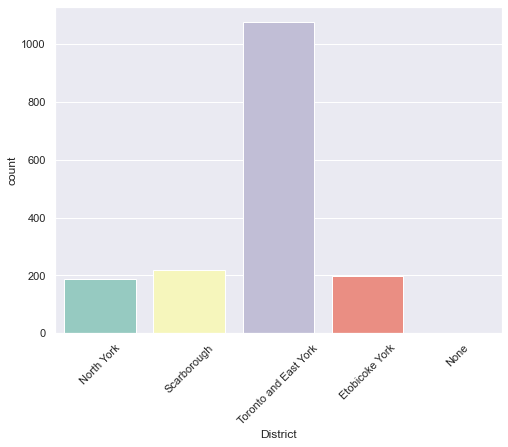

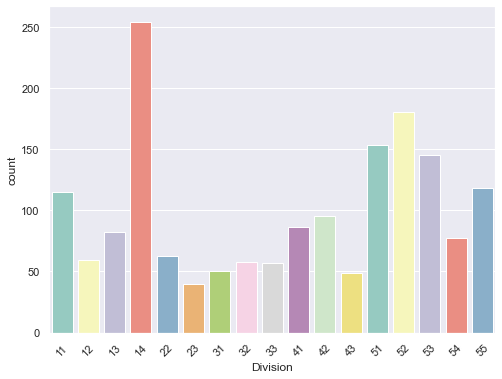

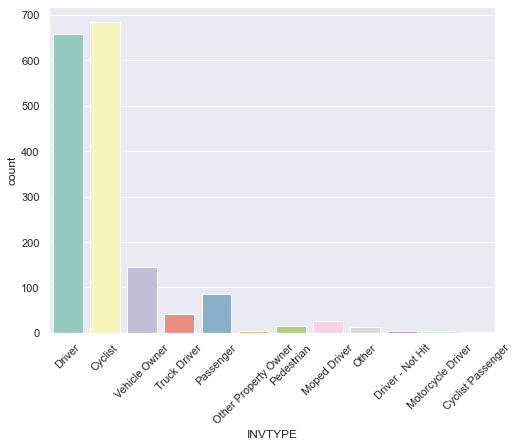

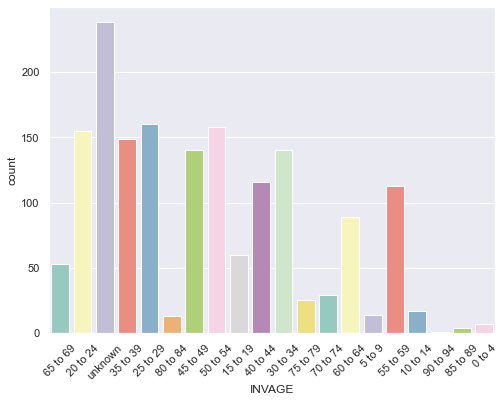

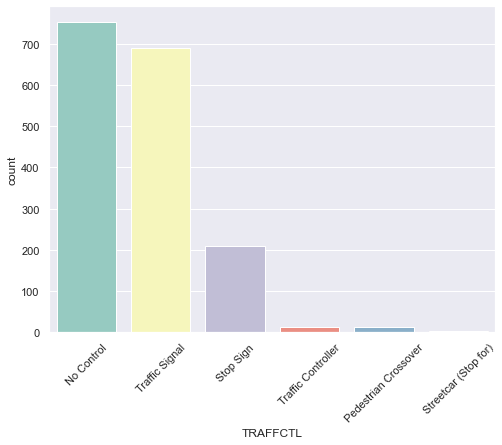

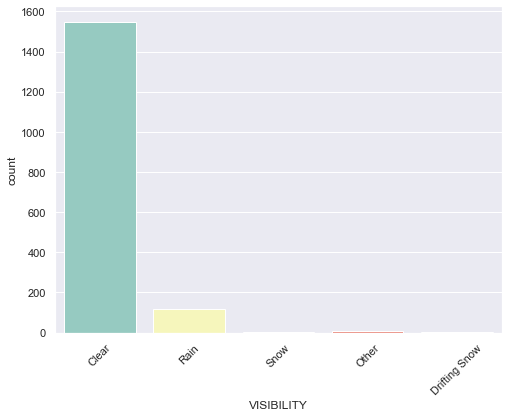

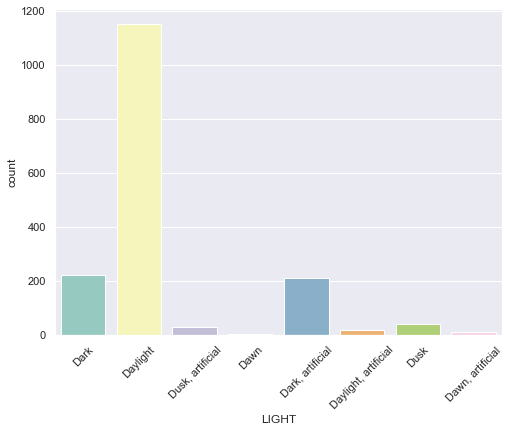

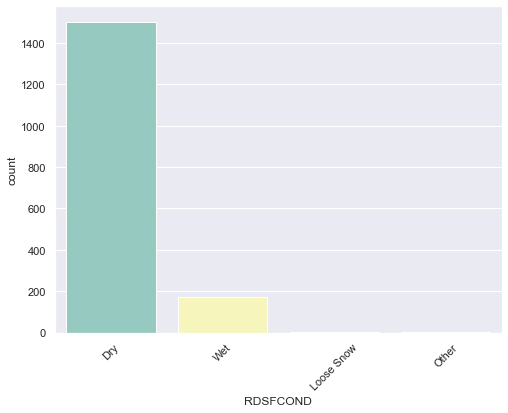

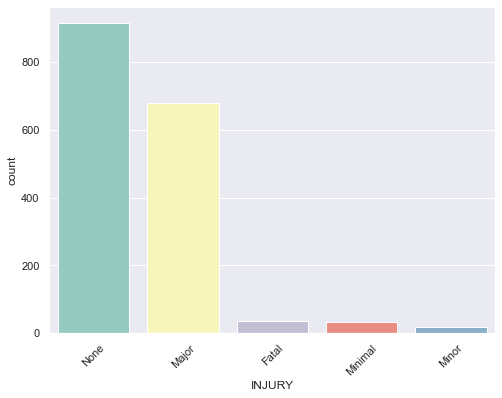

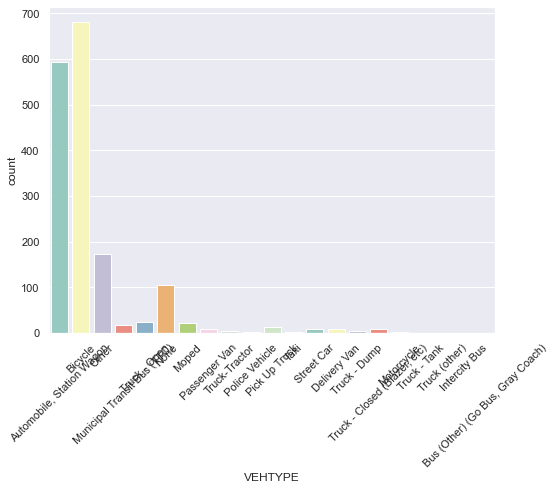

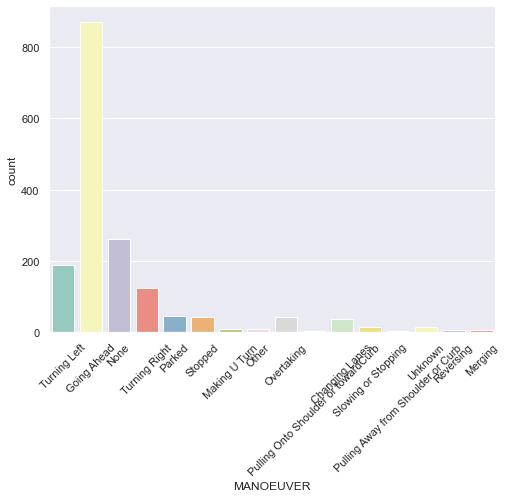

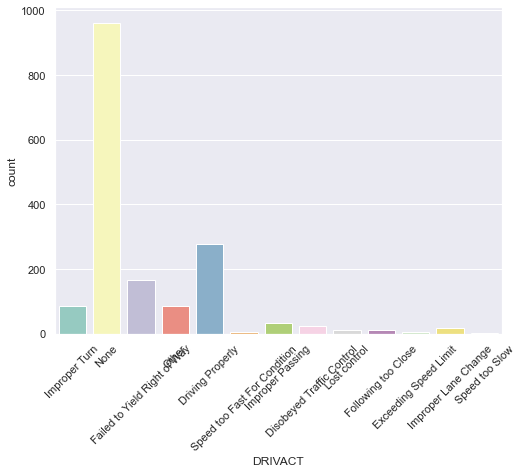

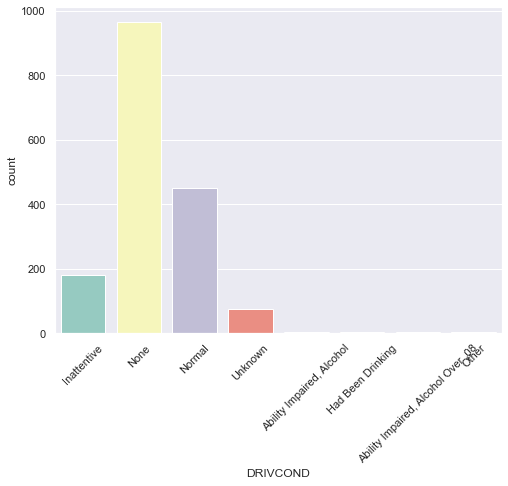

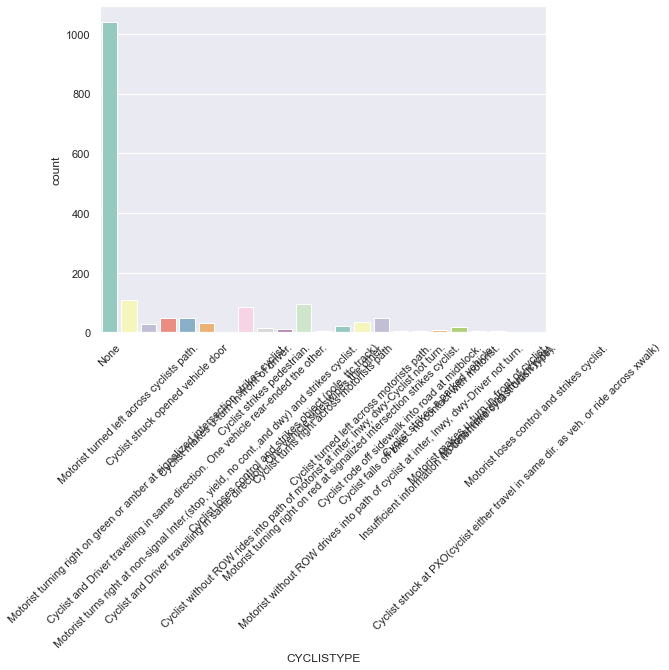

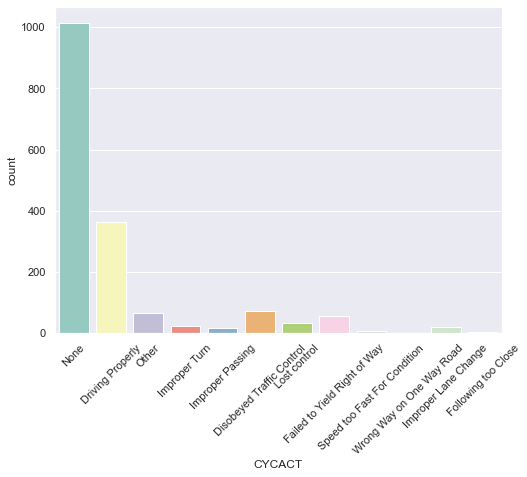

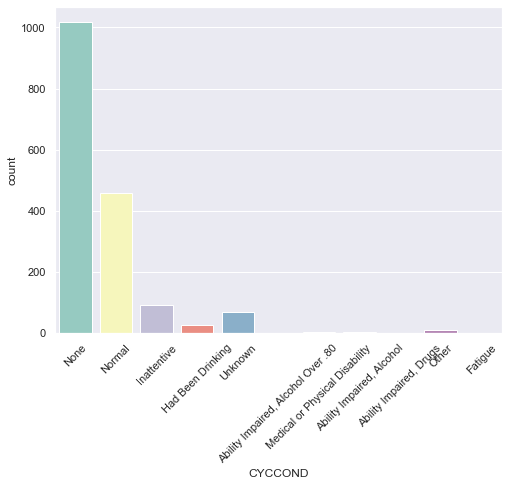

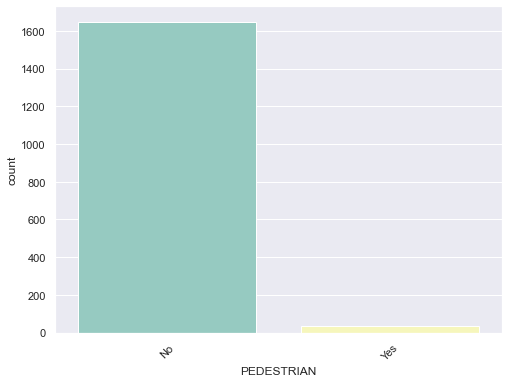

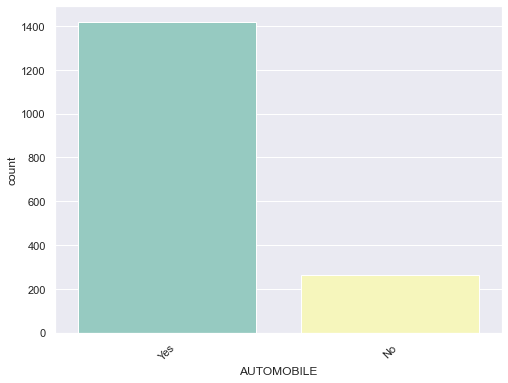

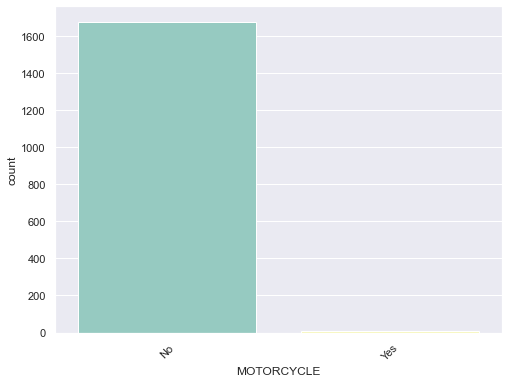

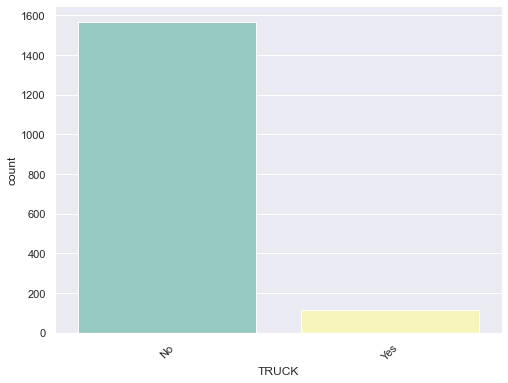

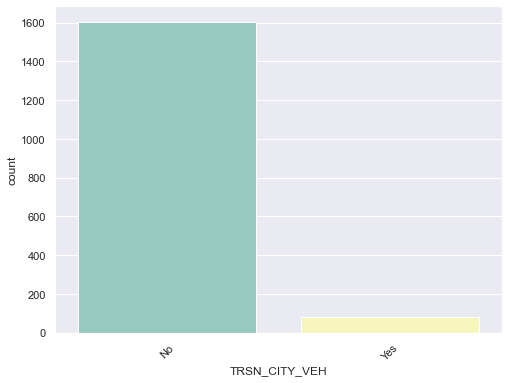

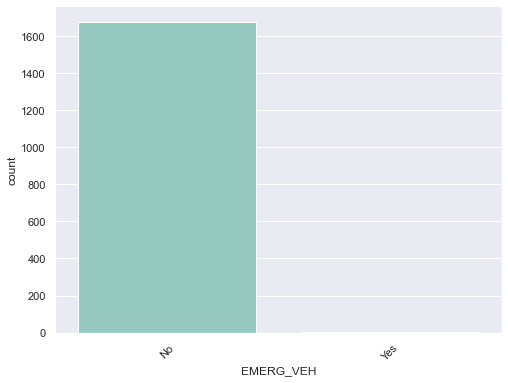

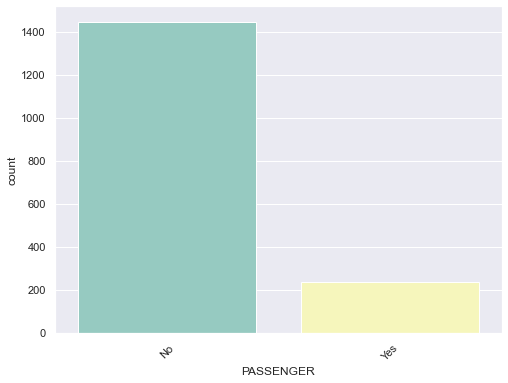

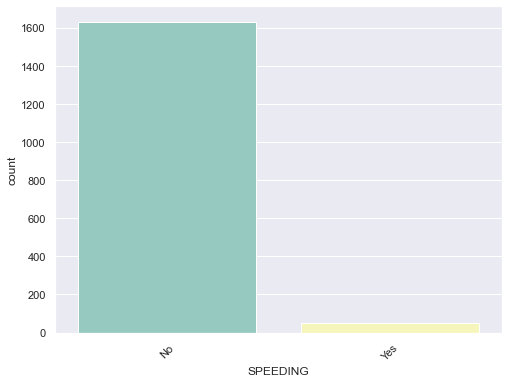

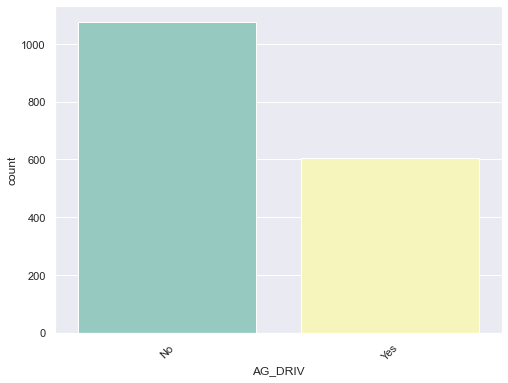

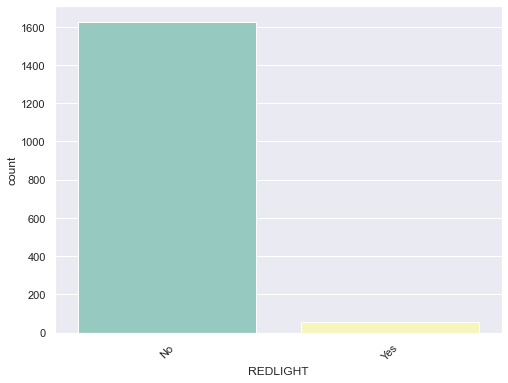

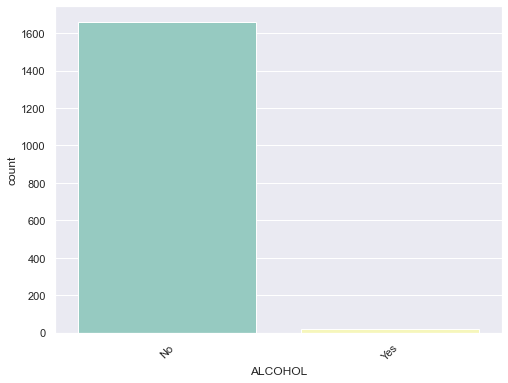

In [8]:
# Looping through all the features we need and drawing count graphs

features = ['ROAD_CLASS', 'District', 'Division', 'INVTYPE', 'INVAGE', 'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND', 'INJURY', 'VEHTYPE', 'MANOEUVER', 'DRIVACT',
       'DRIVCOND', 'CYCLISTYPE', 'CYCACT',
       'CYCCOND', 'PEDESTRIAN','AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH', 'EMERG_VEH',
       'PASSENGER', 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL']

for f in features:
    sns.countplot(x = f, data = cyclists, palette = 'Set3')
    plt.xticks(rotation=45)
    plt.show()

In [9]:
cyclists_data = cyclists

In [10]:
cyclists_data['INJURY'].replace(to_replace='None', value=0, inplace=True)
cyclists_data['INJURY'].replace(to_replace='Major', value=3, inplace=True)
cyclists_data['INJURY'].replace(to_replace='Fatal', value=4, inplace=True)
cyclists_data['INJURY'].replace(to_replace='Minimal', value=1, inplace=True)
cyclists_data['INJURY'].replace(to_replace='Minor', value=2, inplace=True)

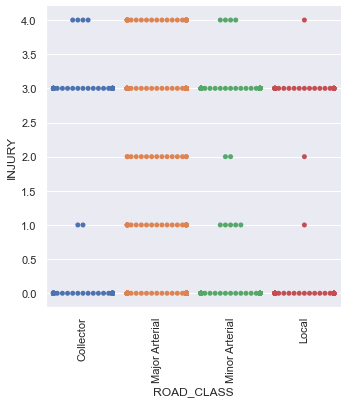

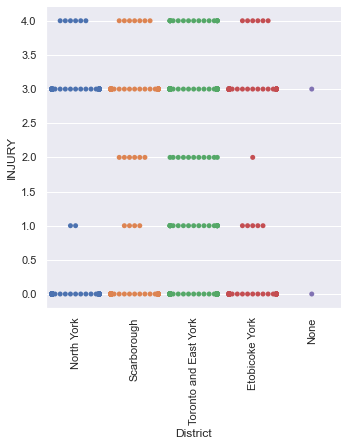

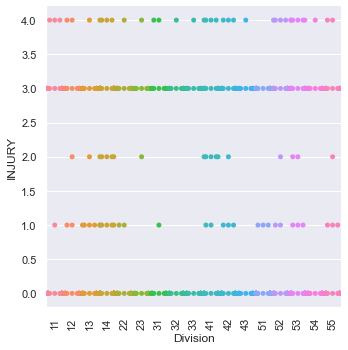

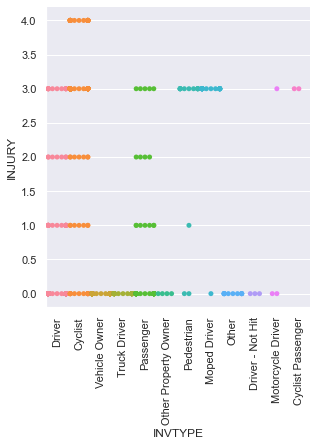

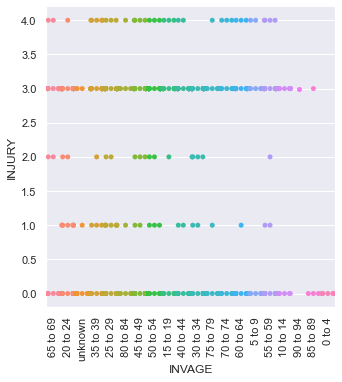

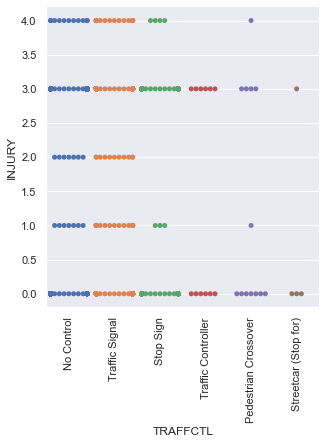

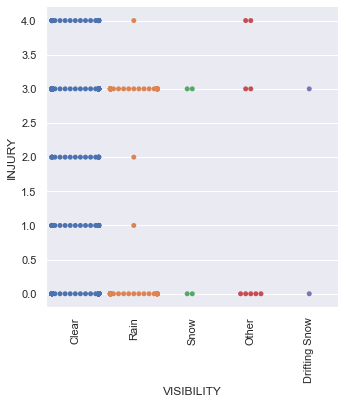

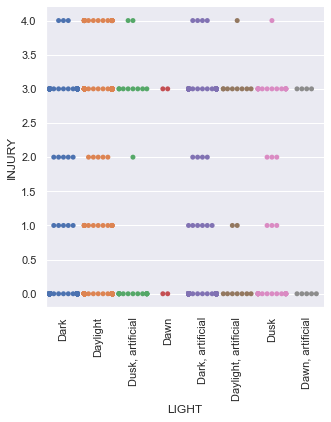

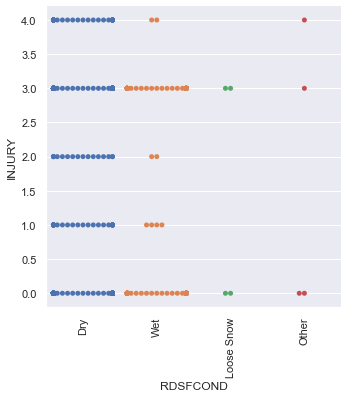

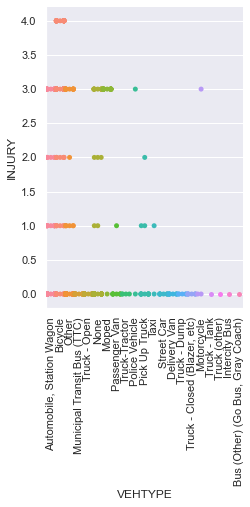

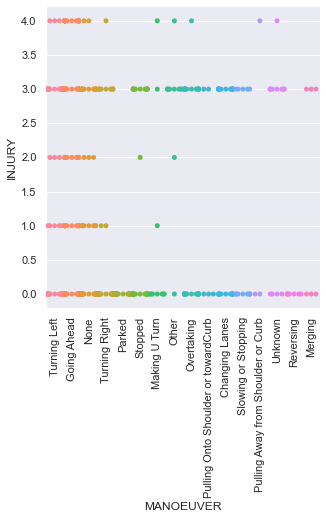

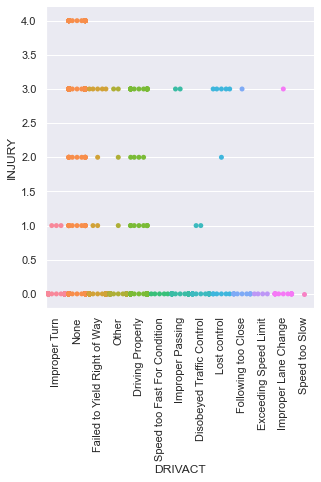

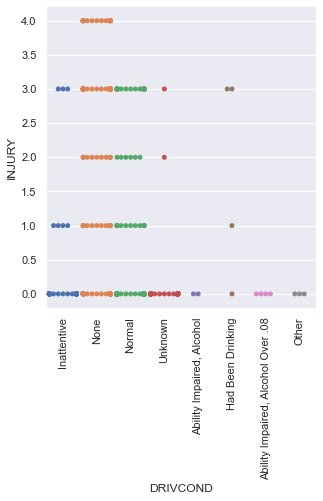

C:\Users\rahul\anaconda3\lib\site-packages\seaborn\axisgrid.py:856: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout()


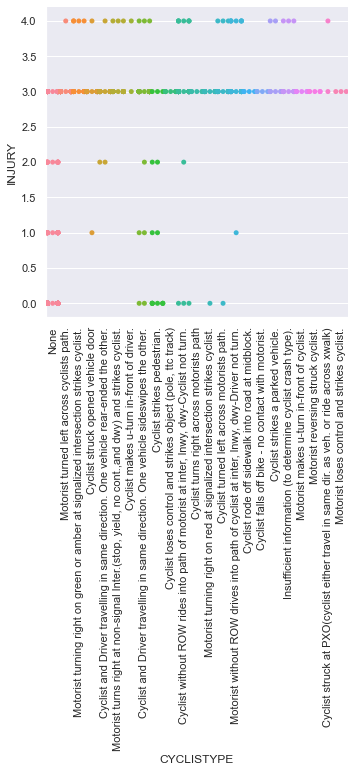

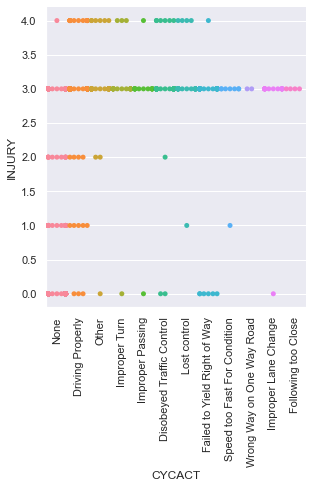

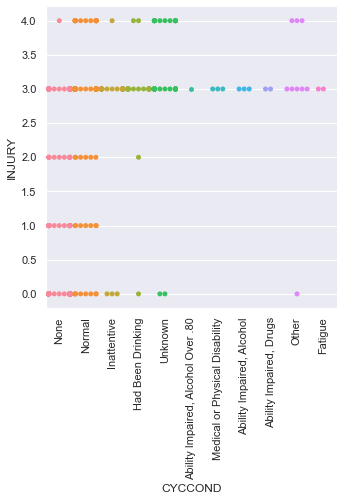

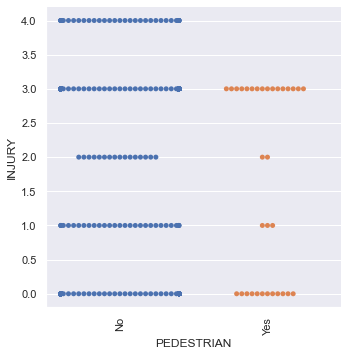

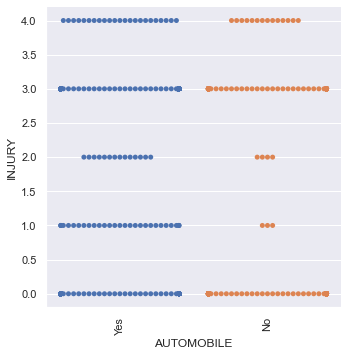

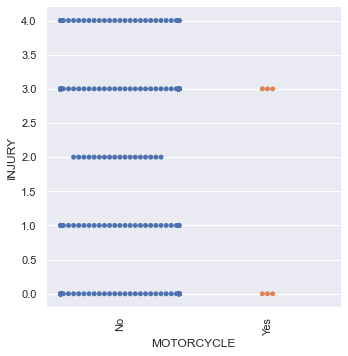

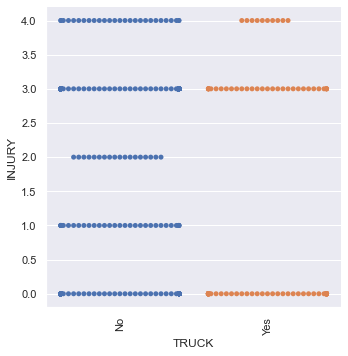

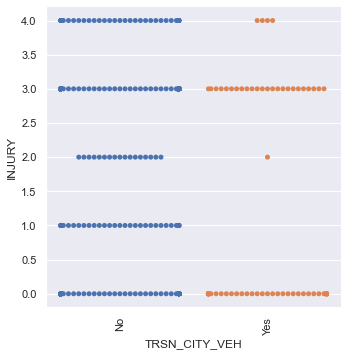

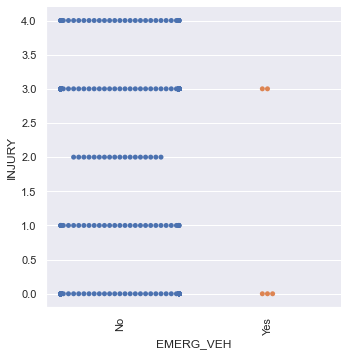

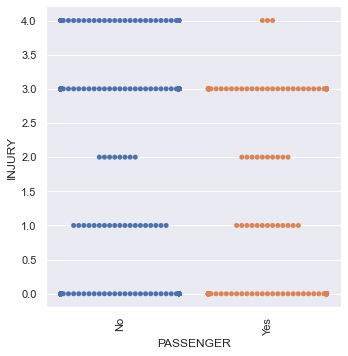

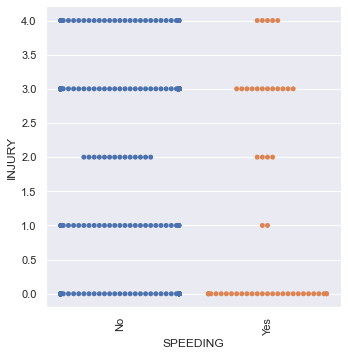

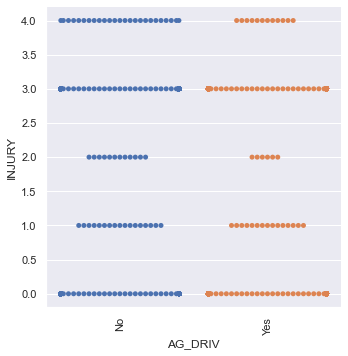

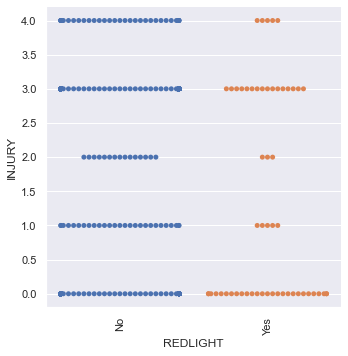

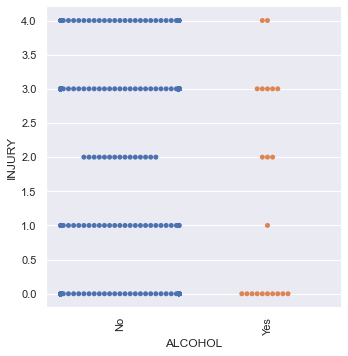

In [11]:
features_new = ['ROAD_CLASS', 'District', 'Division', 'INVTYPE', 'INVAGE', 'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND', 'VEHTYPE', 'MANOEUVER', 'DRIVACT',
       'DRIVCOND', 'CYCLISTYPE', 'CYCACT',
       'CYCCOND', 'PEDESTRIAN','AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH', 'EMERG_VEH',
       'PASSENGER', 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL']

for f in features_new:
    sns.catplot(x=f, y="INJURY", kind="swarm", data=cyclists_data)
    plt.xticks(rotation=90)
    plt.show()

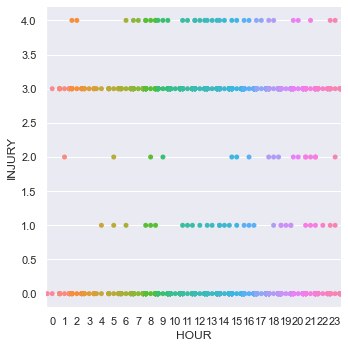

In [12]:
sns.catplot(x="HOUR", y="INJURY", kind="swarm", data=cyclists)

In [13]:
# Making categorical variables into numeric representation

# keeping the columns we need 
data = cyclists[features_new]

# Making categorical variables into numeric representation
new_data = pd.get_dummies(data, columns = features_new)

print(new_data.shape)
# print the shape

new_data.head()

(1681, 207)


ROAD_CLASS_Collector  ROAD_CLASS_Local  ROAD_CLASS_Major Arterial  \
0                     1                 0                          0   
1                     1                 0                          0   
2                     0                 0                          1   
3                     0                 0                          1   
4                     0                 0                          1   

   ROAD_CLASS_Minor Arterial  District_Etobicoke York  District_None  \
0                          0                        0              0   
1                          0                        0              0   
2                          0                        0              0   
3                          0                        0              0   
4                          0                        0              0   

   District_North York  District_Scarborough  District_Toronto and East York  \
0                    1                     0                               0   
1                    1                     0                               0   
2                    0                     1                               0   
3                    0                     1                               0   
4                    0                     1                               0   

   Division_11  Division_12  Division_13  Division_14  Division_22  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Division_23  Division_31  Division_32  Division_33  Division_41  \
0            0            0            0            1            0   
1            0            0            0            1            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Division_42  Division_43  Division_51  Division_52  Division_53  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            1            0            0            0   
3            0            1            0            0            0   
4            0            1            0            0            0   

   Division_54  Division_55  INVTYPE_Cyclist  INVTYPE_Cyclist Passenger  \
0            0            0                0                          0   
1            0            0                1                          0   
2            0            0                0                          0   
3            0            0                0                          0   
4            0            0                1                          0   

   INVTYPE_Driver  INVTYPE_Driver - Not Hit  INVTYPE_Moped Driver  \
0               1                         0                     0   
1               0                         0                     0   
2               0                         0                     0   
3               1                         0                     0   
4               0                         0                     0   

   INVTYPE_Motorcycle Driver  INVTYPE_Other  INVTYPE_Other Property Owner  \
0                          0              0                             0   
1                          0              0                             0   
2                          0              0                             0   
3                          0              0                             0   
4                          0              0                             0   

   INVTYPE_Passenger  INVTYPE_Pedestrian  INVTYPE_Truck Driver  

### Running K-Means without reducing dimensions

In [14]:
# Running Kmeans to look at intertia intially before running k-means with PCA

X = new_data.values

In [15]:
# How to find the best number of Ks?

# Running K means with multiple Ks

no_of_clusters = range(2,20) 
inertia = []


for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(X)
    u = kmeans.inertia_
    inertia.append(u)
    print("The inertia for :", f, "Clusters is:", u)

The inertia for : 2 Clusters is: 14712.840586085742
The inertia for : 3 Clusters is: 13380.986760320344
The inertia for : 4 Clusters is: 12883.640455701498
The inertia for : 5 Clusters is: 12481.707981844706
The inertia for : 6 Clusters is: 12208.201587079762
The inertia for : 7 Clusters is: 11889.544709543983
The inertia for : 8 Clusters is: 11637.772556894824
The inertia for : 9 Clusters is: 11404.069502213653
The inertia for : 10 Clusters is: 11280.729905786648
The inertia for : 11 Clusters is: 11143.838547334994
The inertia for : 12 Clusters is: 11029.765736826845
The inertia for : 13 Clusters is: 10913.063706727842
The inertia for : 14 Clusters is: 10819.378685975016
The inertia for : 15 Clusters is: 10714.71064718265
The inertia for : 16 Clusters is: 10630.39314934801
The inertia for : 17 Clusters is: 10529.99181398372
The inertia for : 18 Clusters is: 10431.189545741889
The inertia for : 19 Clusters is: 10371.52368940037


Text(0.5, 1.0, 'Inertia Plot per k')

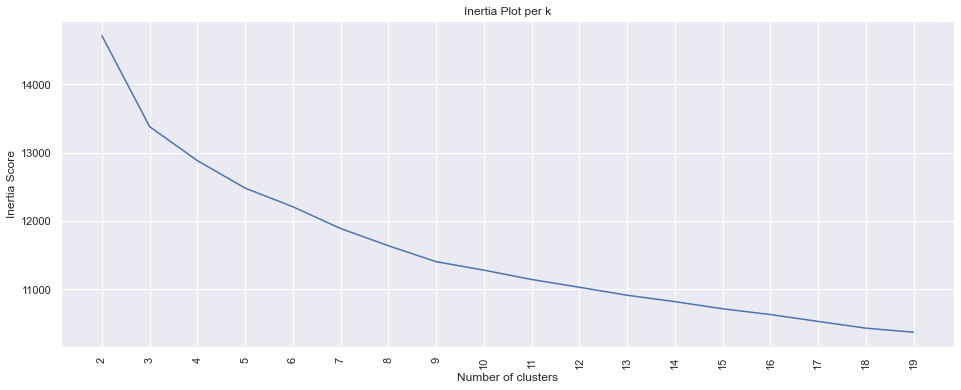

In [16]:
# Creating the scree plot for Intertia - elbow method
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

In [17]:
# Running K means on 5 clusters

kmeans = KMeans(n_clusters=5, random_state=2)
kmeans = kmeans.fit(X)


kmeans.labels_

# "predictions" for new data
predictions = kmeans.predict(X)

# calculating the Counts of the cluster
unique, counts = np.unique(predictions, return_counts=True)
counts = counts.reshape(1,5)

cluster_names = ["Cluster "+str(i) for i in range(1,6)]

# Creating a dataframe
countscldf = pd.DataFrame(counts, columns = cluster_names)

# display
countscldf

Cluster 1  Cluster 2  Cluster 3  Cluster 4  Cluster 5
0        274        367        278        445        317

In [18]:
predictions

array([3, 4, 0, ..., 3, 1, 2])

In [19]:
X.shape

(1681, 207)

### Running PCA

In [20]:
from sklearn import decomposition #PCA
from sklearn.decomposition import PCA

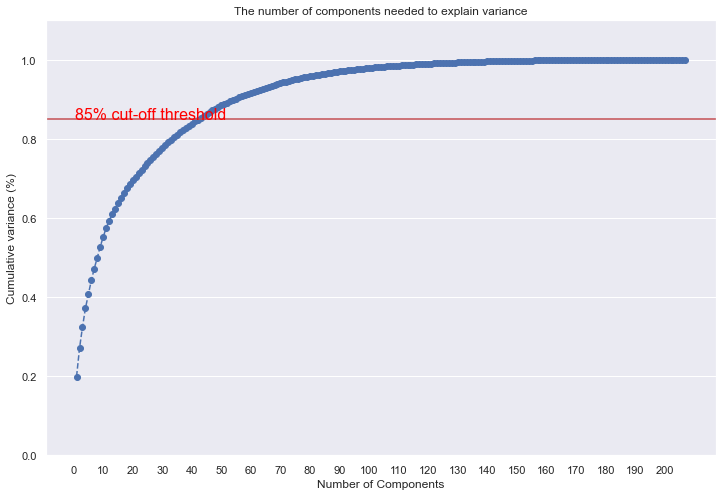

In [21]:
pca = PCA().fit(X)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)

fig, ax = plt.subplots()
xi = np.arange(1, 208, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 210, step=10)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.85, color='r', linestyle='-')
plt.text(0.5, 0.85, '85% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [22]:
# Perform PCA Analysis
pca = decomposition.PCA(n_components=40)
pca.fit(X)

PCA(n_components=40)

In [23]:
# Compute and retrieve the scores values
scores = pca.transform(X)

scores

array([[-1.531836, -0.422139, -0.082755, ..., -0.174041, -0.105045,
        -0.214503],
       [0.877691, -0.064256, -0.169334, ..., -0.430710, 0.445114,
        -0.088175],
       [-0.344066, 2.053028, 1.030226, ..., -0.031522, 0.089179,
        -0.046236],
       ...,
       [-1.348113, -0.429059, -0.033064, ..., -0.175917, 0.108578,
        0.066999],
       [1.901797, -0.641024, -0.039812, ..., -0.446215, -0.386307,
        0.237756],
       [-1.548646, -0.662267, 0.693913, ..., 0.021148, -0.133683,
        0.203689]])

In [24]:
names = ["PC"+str(i) for i in range(1,41)]

scores_df = pd.DataFrame(scores, columns=names)
scores_df

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0    -1.531836 -0.422139 -0.082755 -0.822214  0.433375 -0.904842  0.548684   
1     0.877691 -0.064256 -0.169334 -0.687866  0.686283 -1.107837  0.320238   
2    -0.344066  2.053028  1.030226  1.148204 -0.294873 -0.603941  1.374630   
3    -1.309710  0.041590  0.706311  1.345394 -0.600520 -0.284720  1.494583   
4     1.894202 -0.315685  0.537099  1.402484 -0.279766 -0.243152  1.145464   
...        ...       ...       ...       ...       ...       ...       ...   
1676 -1.601057 -0.922987  0.759659  0.046023  0.466149 -0.910766 -0.691897   
1677 -0.350735  1.288410  1.632391 -0.180314  0.691478 -1.014628 -0.753798   
1678 -1.348113 -0.429059 -0.033064 -0.832885  1.131105 -0.559743  1.150445   
1679  1.901797 -0.641024 -0.039812 -0.738378  1.155348 -0.480989  1.030175   
1680 -1.548646 -0.662267  0.693913 -0.293746 -0.157268  0.281920 -0.320801   

           PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0    -0.201408  0.896868 -0.700399 -0.596168  0.339192 -0.354610  0.436902   
1     0.276935 -0.177885 -0.529820 -0.103787  0.450811 -0.229699 -0.126954   
2     1.151011 -0.239890 -0.603673  0.199089 -0.093419  0.625578  0.344881   
3     0.982637  0.478081 -0.132541 -1.061538  0.002847  0.567662  0.269188   
4     1.351166 -0.275507 -0.059928 -0.373601 -0.190726  0.499379  0.559376   
...        ...       ...       ...       ...       ...       ...       ...   
1676  0.771227 -0.969295  0.392489 -0.563734 -0.392670  0.829367  0.275330   
1677  0.274032 -0.454724  0.561176 -1.049898 -0.331331  0.612852  0.275173   
1678  0.560299  0.207176 -0.172691  0.401742 -0.457738  0.391751 -0.535580   
1679  0.532630  0.152925  0.218781  0.155004 -0.642611  0.081262  0.357411   
1680  1.041168 -0.020126 -0.726827  0.025222  0.003005 -0.099860 -0.713034   

          PC15      PC16      PC17      PC18      PC19      PC20      PC21  \
0     0.851295 -0.031097 -0.444048 -0.171275  0.449551 -0.425286  0.650063   
1     0.662264  0.437147 -0.451923  0.180993  0.285172 -0.087380  0.922767   
2    -0.151818 -0.135553  0.522446 -0.400742  0.930315  0.162636 -0.054618   
3     0.079948 -0.577906  0.288977 -0.605434  1.112651  0.888027 -0.246408   
4     0.050893 -0.407617  0.329979 -0.695575  1.105074 -0.138052 -0.033928   
...        ...       ...       ...       ...       ...       ...       ...   
1676 -0.129762 -0.000219  0.186729 -0.058641 -0.265109  0.055464 -0.046596   
1677  0.022729 -0.181666  0.245012 -0.135655 -0.285565  0.147286 -0.347188   
1678  0.511623 -0.852971  0.084261  0.562733 -0.217422 -0.087767 -0.452399   
1679  0.332892 -0.440574  0.325312  0.345189 -0.393159  0.222469 -0.524588   
1680 -0.034546  0.178977  0.698009 -0.244192 -0.786196  0.248418  0.079581   

          PC22      PC23      PC24      PC25      PC26      PC27      PC28  \
0    -0.019894  0.340803 -0.545972 -0.048099  0.078920  0.687071 -0.155410   
1    -0.134186  0.417142  0.428015 -0.346844 -0.018209  0.599122 -0.547591   
2     0.012296 -0.253053  0.063252  0.025812 -0.267159 -0.055401 -0.089729   
3    -0.197554 -0.361818  0.410300  0.809055 -0.180867  0.540496 -0.307013   
4     0.640825 -0.075597  0.101045  0.396611 -0.315167 -0.114051 -0.222371   
...        ...       ...       ...       ...       ...       ...       ...   
1676 -0.181386 -0.753990 -0.212098  0.245532  0.287328 -0.052746 -0.167650   
1677  0.195254  0.356490  0.324821 -0.144542  0.087355  0.172729 -0.041676   
1678 -0.073777 -0.561378  0.053232 -0.107444 -0.174271 -0.825267 -0.038892   
1679  0.136127 -0.079053  0.137972 -0.046467 -0.149166 -0.483798 -0.085652   
1680  0.130247 -0.349219 -0.206131 -0.169797  0.012275 -0.381213 -0.459430   

          PC29      PC30      PC31      PC32      PC33      PC34      PC35  \
0     0.392972 -0.090313 -0.037844 -0.072676  0.252645 -0.129964 -0.389734   
1     0.391718  0.378936  0.065384 -0.335233  0.192588 -0.155509 -0.182501   
2     0.363930  0.340689 -0.0

In [25]:
loadings = pca.components_.T
df_loadings = pd.DataFrame(loadings, columns=names, index=new_data.columns)
df_loadings

PC1       PC2       PC3       PC4       PC5  \
ROAD_CLASS_Collector       0.000654 -0.017162 -0.002599 -0.073845 -0.003566   
ROAD_CLASS_Local           0.001103 -0.006100 -0.011788 -0.074755  0.035361   
ROAD_CLASS_Major Arterial -0.004579  0.072295 -0.034510  0.379493 -0.200931   
ROAD_CLASS_Minor Arterial  0.002822 -0.049034  0.048897 -0.230893  0.169136   
District_Etobicoke York    0.002413 -0.035308  0.004124  0.006541  0.007842   
...                             ...       ...       ...       ...       ...   
AG_DRIV_Yes               -0.005715 -0.124213  0.558747  0.066026 -0.202909   
REDLIGHT_No                0.002990  0.011269 -0.058332 -0.054039 -0.010277   
REDLIGHT_Yes              -0.002990 -0.011269  0.058332  0.054039  0.010277   
ALCOHOL_No                 0.002451  0.003020 -0.021495 -0.026488 -0.014593   
ALCOHOL_Yes               -0.002451 -0.003020  0.021495  0.026488  0.014593   

                                PC6       PC7       PC8       PC9      PC10  \
ROAD_CLASS_Collector      -0.062551  0.073168 -0.028904 -0.048992 -0.017332   
ROAD_CLASS_Local          -0.068649  0.032170 -0.035458 -0.011156  0.015785   
ROAD_CLASS_Major Arterial -0.121338 -0.476347  0.256081  0.206947 -0.115428   
ROAD_CLASS_Minor Arterial  0.252537  0.371008 -0.191718 -0.146800  0.116974   
District_Etobicoke York   -0.222842  0.050461 -0.097741 -0.028974 -0.017555   
...                             ...       ...       ...       ...       ...   
AG_DRIV_Yes                0.108522  0.034541  0.122215 -0.097678  0.023292   
REDLIGHT_No               -0.029856  0.007042  0.011724  0.069248  0.035569   
REDLIGHT_Yes               0.029856 -0.007042 -0.011724 -0.069248 -0.035569   
ALCOHOL_No                -0.000019  0.013790 -0.006430  0.025822  0.019578   
ALCOHOL_Yes                0.000019 -0.013790  0.006430 -0.025822 -0.019578   

                               PC11      PC12      PC13      PC14      PC15  \
ROAD_CLASS_Collector       0.008567  0.172980 -0.045423  0.040828 -0.120269   
ROAD_CLASS_Local           0.012596  0.108897  0.049041  0.004126  0.044602   
ROAD_CLASS_Major Arterial -0.019627 -0.072575  0.002650  0.012287  0.006470   
ROAD_CLASS_Minor Arterial -0.001536 -0.209302 -0.006269 -0.057241  0.069196   
District_Etobicoke York   -0.033212 -0.121585 -0.406180 -0.222112 -0.442856   
...                             ...       ...       ...       ...       ...   
AG_DRIV_Yes               -0.060928  0.043968 -0.001573 -0.080625 -0.069128   
REDLIGHT_No                0.011354  0.049617 -0.075024  0.010676 -0.022003   
REDLIGHT_Yes              -0.011354 -0.049617  0.075024 -0.010676  0.022003   
ALCOHOL_No                 0.024774  0.018391 -0.032293 -0.007286  0.003148   
ALCOHOL_Yes               -0.024774 -0.018391  0.032293  0.007286 -0.003148   

                               PC16      PC17      PC18      PC19      PC20  \
ROAD_CLASS_Collector      -0.104285  0.025721 -0.122425 -0.081209 -0.097416   
ROAD_CLASS_Local          -0.018543 -0.049805 -0.074409 -0.080125 -0.094651   
ROAD_CLASS_Major Arterial  0.061082 -0.005619 -0.023792  0.000898  0.068519   
ROAD_CLASS_Minor Arterial  0.061746  0.029702  0.220625  0.160436  0.123548   
District_Etobicoke York   -0.125628 -0.083362 -0.150632  0.085177 -0.059762   
...                             ...       ...       ...       ...       ...   
AG_DRIV_Yes                0.114402  0.054931  0.011756 -0.018894  0.024337   
REDLIGHT_No                0.008436  0.020174 -0.072610 -0.018086  0.058680   
REDLIGHT_Yes              -0.008436 -0.020174  0.072610  0.018086 -0.058680   
ALCOHOL_No                 0.002850  0.021001 -0.014694 -0.009833  0.028848   
ALCOHOL_Yes               -0.002850 -0.021001  0.014694  0.009833 -0.028848   

                               PC21      PC22      PC23      PC24      PC25  \
ROAD_CLASS_Collector       0.284934 -0.033537  0.086373  0.035930  0.056284   
ROAD_CLASS_Local           0.101800 -0.036395  0.071942 -0.150110 -0.052297   

In [26]:
df_loading = df_loadings.T
df_loading.columns

Index(['ROAD_CLASS_Collector', 'ROAD_CLASS_Local', 'ROAD_CLASS_Major Arterial',
       'ROAD_CLASS_Minor Arterial', 'District_Etobicoke York', 'District_None',
       'District_North York', 'District_Scarborough',
       'District_Toronto and East York', 'Division_11',
       ...
       'PASSENGER_No', 'PASSENGER_Yes', 'SPEEDING_No', 'SPEEDING_Yes',
       'AG_DRIV_No', 'AG_DRIV_Yes', 'REDLIGHT_No', 'REDLIGHT_Yes',
       'ALCOHOL_No', 'ALCOHOL_Yes'],
      dtype='object', length=207)

In [27]:
n_pcs= pca.components_.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = df_loading.columns

# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df = pd.DataFrame(dic.items(), columns = ['PC','Feature'])
df.set_index('PC', inplace=True)

In [28]:
df

Feature
PC                                                     
PC0                                     INVTYPE_Cyclist
PC1                                      MANOEUVER_None
PC2                                          AG_DRIV_No
PC3                             TRAFFCTL_Traffic Signal
PC4                                      LIGHT_Daylight
PC5                      District_Toronto and East York
PC6                           ROAD_CLASS_Major Arterial
PC7                                      LIGHT_Daylight
PC8                               MANOEUVER_Going Ahead
PC9                                      LIGHT_Daylight
PC10                                     LIGHT_Daylight
PC11                                 TRAFFCTL_Stop Sign
PC12                               District_Scarborough
PC13                              MANOEUVER_Going Ahead
PC14                                District_North York
PC15                                    DRIVCOND_Normal
PC16                                         LIGHT_Dark
PC17                                        Division_14
PC18                             LIGHT_Dark, artificial
PC19                             MANOEUVER_Turning Left
PC20                                        Division_52
PC21                                    INVAGE_25 to 29
PC22                                    INVAGE_50 to 54
PC23                                    INVAGE_20 to 24
PC24                                    INVAGE_35 to 39
PC25                                        Division_51
PC26                                    INVAGE_30 to 34
PC27                                    INVAGE_30 to 34
PC28                                    INVAGE_45 to 49
PC29                                        Division_53
PC30                                    INVAGE_30 to 34
PC31                                    INVAGE_40 to 44
PC32                                        Division_11
PC33                                    INVAGE_55 to 59
PC34                                    INVAGE_55 to 59
PC35                                   ROAD_CLASS_Local
PC36                                        Division_11
PC37                                        Division_55
PC38  CYCLISTYPE_Motorist turned left across cyclist...
PC39                                    INVAGE_60 to 64

In [29]:
import numpy as np
import plotly.express as px

In [30]:
# Explained variance for each PC
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.199059, 0.071290, 0.053805, 0.047540, 0.035484, 0.035141,
       0.030055, 0.027716, 0.027105, 0.024717, 0.022599, 0.018536,
       0.016128, 0.014512, 0.013787, 0.013380, 0.012648, 0.011468,
       0.010990, 0.009472, 0.009385, 0.008840, 0.008733, 0.008293,
       0.008266, 0.008124, 0.007965, 0.007596, 0.007379, 0.007167,
       0.007060, 0.006822, 0.006633, 0.006352, 0.006238, 0.005993,
       0.005924, 0.005604, 0.005486, 0.005389])

In [31]:
# Preparing the cumulative variance data
cumulative_variance = np.cumsum(np.round(explained_variance, decimals=3))

In [32]:
pc_df = pd.DataFrame(names, columns=['PC'])
explained_variance_df = pd.DataFrame(explained_variance, columns=['Explained Variance'])
cumulative_variance_df = pd.DataFrame(cumulative_variance, columns=['Cumulative Variance'])

In [33]:
df_explained_variance = pd.concat([pc_df, explained_variance_df, cumulative_variance_df], axis=1)
df_explained_variance

PC  Explained Variance  Cumulative Variance
0    PC1            0.199059                0.199
1    PC2            0.071290                0.270
2    PC3            0.053805                0.324
3    PC4            0.047540                0.372
4    PC5            0.035484                0.407
5    PC6            0.035141                0.442
6    PC7            0.030055                0.472
7    PC8            0.027716                0.500
8    PC9            0.027105                0.527
9   PC10            0.024717                0.552
10  PC11            0.022599                0.575
11  PC12            0.018536                0.594
12  PC13            0.016128                0.610
13  PC14            0.014512                0.625
14  PC15            0.013787                0.639
15  PC16            0.013380                0.652
16  PC17            0.012648                0.665
17  PC18            0.011468                0.676
18  PC19            0.010990                0.687
19  PC20            0.009472                0.696
20  PC21            0.009385                0.705
21  PC22            0.008840                0.714
22  PC23            0.008733                0.723
23  PC24            0.008293                0.731
24  PC25            0.008266                0.739
25  PC26            0.008124                0.747
26  PC27            0.007965                0.755
27  PC28            0.007596                0.763
28  PC29            0.007379                0.770
29  PC30            0.007167                0.777
30  PC31            0.007060                0.784
31  PC32            0.006822                0.791
32  PC33            0.006633                0.798
33  PC34            0.006352                0.804
34  PC35            0.006238                0.810
35  PC36            0.005993                0.816
36  PC37            0.005924                0.822
37  PC38            0.005604                0.828
38  PC39            0.005486                0.833
39  PC40            0.005389                0.838

In [34]:
# Explained Variance
fig = px.bar(df_explained_variance, 
             x='PC', y='Explained Variance',
             text='Explained Variance',
             width=1000)

fig.update_traces(texttemplate='%{text:.3f}', textposition='outside')
fig.show()

### Perform K-Means after PCA

The inertia for : 2 Clusters is: 11801.363589613804
The inertia for : 3 Clusters is: 10470.519966691616
The inertia for : 4 Clusters is: 9982.355611433535
The inertia for : 5 Clusters is: 9579.945736545693
The inertia for : 6 Clusters is: 9303.602862295333
The inertia for : 7 Clusters is: 8992.491017885657
The inertia for : 8 Clusters is: 8798.417277255903
The inertia for : 9 Clusters is: 8555.707734247753
The inertia for : 10 Clusters is: 8416.00164252012
The inertia for : 11 Clusters is: 8322.768961953167
The inertia for : 12 Clusters is: 8175.443332846387
The inertia for : 13 Clusters is: 8050.640504988611
The inertia for : 14 Clusters is: 8004.219753491761
The inertia for : 15 Clusters is: 7854.493903727367
The inertia for : 16 Clusters is: 7774.771182290531
The inertia for : 17 Clusters is: 7732.7008440367335
The inertia for : 18 Clusters is: 7639.5799136698915
The inertia for : 19 Clusters is: 7574.280353067911


Text(0.5, 1.0, 'Inertia Plot per k')

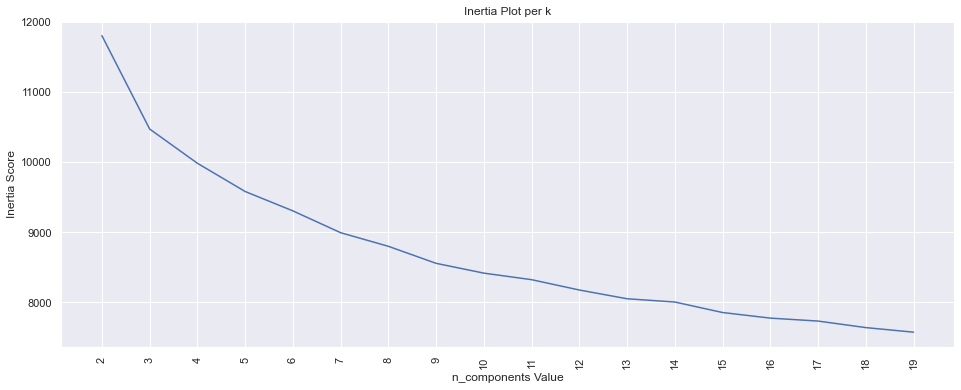

In [35]:
inertia = []

#running Kmeans

for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(scores_df)
    u = kmeans.inertia_
    inertia.append(u)
    print("The inertia for :", f, "Clusters is:", u)

# Creating the scree plot for Intertia - elbow method
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel('n_components Value')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

In [36]:
# Running K means on 5 clusters

kmeans = KMeans(n_clusters=5, random_state=2)
kmeans = kmeans.fit(scores_df)


kmeans.labels_

# "predictions" for new data
predictions = kmeans.predict(scores_df)

# calculating the Counts of the cluster
unique, counts = np.unique(predictions, return_counts=True)
counts = counts.reshape(1,5)

cluster_names = ["Cluster "+str(i) for i in range(1,6)]

# Creating a dataframe
countscldf = pd.DataFrame(counts, columns = cluster_names)

# display
countscldf

Cluster 1  Cluster 2  Cluster 3  Cluster 4  Cluster 5
0        278        447        237        445        274

In [37]:
df = pd.DataFrame(scores_df,columns=names)
df

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0    -1.531836 -0.422139 -0.082755 -0.822214  0.433375 -0.904842  0.548684   
1     0.877691 -0.064256 -0.169334 -0.687866  0.686283 -1.107837  0.320238   
2    -0.344066  2.053028  1.030226  1.148204 -0.294873 -0.603941  1.374630   
3    -1.309710  0.041590  0.706311  1.345394 -0.600520 -0.284720  1.494583   
4     1.894202 -0.315685  0.537099  1.402484 -0.279766 -0.243152  1.145464   
...        ...       ...       ...       ...       ...       ...       ...   
1676 -1.601057 -0.922987  0.759659  0.046023  0.466149 -0.910766 -0.691897   
1677 -0.350735  1.288410  1.632391 -0.180314  0.691478 -1.014628 -0.753798   
1678 -1.348113 -0.429059 -0.033064 -0.832885  1.131105 -0.559743  1.150445   
1679  1.901797 -0.641024 -0.039812 -0.738378  1.155348 -0.480989  1.030175   
1680 -1.548646 -0.662267  0.693913 -0.293746 -0.157268  0.281920 -0.320801   

           PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0    -0.201408  0.896868 -0.700399 -0.596168  0.339192 -0.354610  0.436902   
1     0.276935 -0.177885 -0.529820 -0.103787  0.450811 -0.229699 -0.126954   
2     1.151011 -0.239890 -0.603673  0.199089 -0.093419  0.625578  0.344881   
3     0.982637  0.478081 -0.132541 -1.061538  0.002847  0.567662  0.269188   
4     1.351166 -0.275507 -0.059928 -0.373601 -0.190726  0.499379  0.559376   
...        ...       ...       ...       ...       ...       ...       ...   
1676  0.771227 -0.969295  0.392489 -0.563734 -0.392670  0.829367  0.275330   
1677  0.274032 -0.454724  0.561176 -1.049898 -0.331331  0.612852  0.275173   
1678  0.560299  0.207176 -0.172691  0.401742 -0.457738  0.391751 -0.535580   
1679  0.532630  0.152925  0.218781  0.155004 -0.642611  0.081262  0.357411   
1680  1.041168 -0.020126 -0.726827  0.025222  0.003005 -0.099860 -0.713034   

          PC15      PC16      PC17      PC18      PC19      PC20      PC21  \
0     0.851295 -0.031097 -0.444048 -0.171275  0.449551 -0.425286  0.650063   
1     0.662264  0.437147 -0.451923  0.180993  0.285172 -0.087380  0.922767   
2    -0.151818 -0.135553  0.522446 -0.400742  0.930315  0.162636 -0.054618   
3     0.079948 -0.577906  0.288977 -0.605434  1.112651  0.888027 -0.246408   
4     0.050893 -0.407617  0.329979 -0.695575  1.105074 -0.138052 -0.033928   
...        ...       ...       ...       ...       ...       ...       ...   
1676 -0.129762 -0.000219  0.186729 -0.058641 -0.265109  0.055464 -0.046596   
1677  0.022729 -0.181666  0.245012 -0.135655 -0.285565  0.147286 -0.347188   
1678  0.511623 -0.852971  0.084261  0.562733 -0.217422 -0.087767 -0.452399   
1679  0.332892 -0.440574  0.325312  0.345189 -0.393159  0.222469 -0.524588   
1680 -0.034546  0.178977  0.698009 -0.244192 -0.786196  0.248418  0.079581   

          PC22      PC23      PC24      PC25      PC26      PC27      PC28  \
0    -0.019894  0.340803 -0.545972 -0.048099  0.078920  0.687071 -0.155410   
1    -0.134186  0.417142  0.428015 -0.346844 -0.018209  0.599122 -0.547591   
2     0.012296 -0.253053  0.063252  0.025812 -0.267159 -0.055401 -0.089729   
3    -0.197554 -0.361818  0.410300  0.809055 -0.180867  0.540496 -0.307013   
4     0.640825 -0.075597  0.101045  0.396611 -0.315167 -0.114051 -0.222371   
...        ...       ...       ...       ...       ...       ...       ...   
1676 -0.181386 -0.753990 -0.212098  0.245532  0.287328 -0.052746 -0.167650   
1677  0.195254  0.356490  0.324821 -0.144542  0.087355  0.172729 -0.041676   
1678 -0.073777 -0.561378  0.053232 -0.107444 -0.174271 -0.825267 -0.038892   
1679  0.136127 -0.079053  0.137972 -0.046467 -0.149166 -0.483798 -0.085652   
1680  0.130247 -0.349219 -0.206131 -0.169797  0.012275 -0.381213 -0.459430   

          PC29      PC30      PC31      PC32      PC33      PC34      PC35  \
0     0.392972 -0.090313 -0.037844 -0.072676  0.252645 -0.129964 -0.389734   
1     0.391718  0.378936  0.065384 -0.335233  0.192588 -0.155509 -0.182501   
2     0.363930  0.340689 -0.0

In [38]:
clusters = kmeans.labels_

In [39]:
INJURY = cyclists['INJURY']
df_new = pd.concat([df, INJURY], axis=1)
df_new

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0    -1.531836 -0.422139 -0.082755 -0.822214  0.433375 -0.904842  0.548684   
1     0.877691 -0.064256 -0.169334 -0.687866  0.686283 -1.107837  0.320238   
2    -0.344066  2.053028  1.030226  1.148204 -0.294873 -0.603941  1.374630   
3    -1.309710  0.041590  0.706311  1.345394 -0.600520 -0.284720  1.494583   
4     1.894202 -0.315685  0.537099  1.402484 -0.279766 -0.243152  1.145464   
...        ...       ...       ...       ...       ...       ...       ...   
1676 -1.601057 -0.922987  0.759659  0.046023  0.466149 -0.910766 -0.691897   
1677 -0.350735  1.288410  1.632391 -0.180314  0.691478 -1.014628 -0.753798   
1678 -1.348113 -0.429059 -0.033064 -0.832885  1.131105 -0.559743  1.150445   
1679  1.901797 -0.641024 -0.039812 -0.738378  1.155348 -0.480989  1.030175   
1680 -1.548646 -0.662267  0.693913 -0.293746 -0.157268  0.281920 -0.320801   

           PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0    -0.201408  0.896868 -0.700399 -0.596168  0.339192 -0.354610  0.436902   
1     0.276935 -0.177885 -0.529820 -0.103787  0.450811 -0.229699 -0.126954   
2     1.151011 -0.239890 -0.603673  0.199089 -0.093419  0.625578  0.344881   
3     0.982637  0.478081 -0.132541 -1.061538  0.002847  0.567662  0.269188   
4     1.351166 -0.275507 -0.059928 -0.373601 -0.190726  0.499379  0.559376   
...        ...       ...       ...       ...       ...       ...       ...   
1676  0.771227 -0.969295  0.392489 -0.563734 -0.392670  0.829367  0.275330   
1677  0.274032 -0.454724  0.561176 -1.049898 -0.331331  0.612852  0.275173   
1678  0.560299  0.207176 -0.172691  0.401742 -0.457738  0.391751 -0.535580   
1679  0.532630  0.152925  0.218781  0.155004 -0.642611  0.081262  0.357411   
1680  1.041168 -0.020126 -0.726827  0.025222  0.003005 -0.099860 -0.713034   

          PC15      PC16      PC17      PC18      PC19      PC20      PC21  \
0     0.851295 -0.031097 -0.444048 -0.171275  0.449551 -0.425286  0.650063   
1     0.662264  0.437147 -0.451923  0.180993  0.285172 -0.087380  0.922767   
2    -0.151818 -0.135553  0.522446 -0.400742  0.930315  0.162636 -0.054618   
3     0.079948 -0.577906  0.288977 -0.605434  1.112651  0.888027 -0.246408   
4     0.050893 -0.407617  0.329979 -0.695575  1.105074 -0.138052 -0.033928   
...        ...       ...       ...       ...       ...       ...       ...   
1676 -0.129762 -0.000219  0.186729 -0.058641 -0.265109  0.055464 -0.046596   
1677  0.022729 -0.181666  0.245012 -0.135655 -0.285565  0.147286 -0.347188   
1678  0.511623 -0.852971  0.084261  0.562733 -0.217422 -0.087767 -0.452399   
1679  0.332892 -0.440574  0.325312  0.345189 -0.393159  0.222469 -0.524588   
1680 -0.034546  0.178977  0.698009 -0.244192 -0.786196  0.248418  0.079581   

          PC22      PC23      PC24      PC25      PC26      PC27      PC28  \
0    -0.019894  0.340803 -0.545972 -0.048099  0.078920  0.687071 -0.155410   
1    -0.134186  0.417142  0.428015 -0.346844 -0.018209  0.599122 -0.547591   
2     0.012296 -0.253053  0.063252  0.025812 -0.267159 -0.055401 -0.089729   
3    -0.197554 -0.361818  0.410300  0.809055 -0.180867  0.540496 -0.307013   
4     0.640825 -0.075597  0.101045  0.396611 -0.315167 -0.114051 -0.222371   
...        ...       ...       ...       ...       ...       ...       ...   
1676 -0.181386 -0.753990 -0.212098  0.245532  0.287328 -0.052746 -0.167650   
1677  0.195254  0.356490  0.324821 -0.144542  0.087355  0.172729 -0.041676   
1678 -0.073777 -0.561378  0.053232 -0.107444 -0.174271 -0.825267 -0.038892   
1679  0.136127 -0.079053  0.137972 -0.046467 -0.149166 -0.483798 -0.085652   
1680  0.130247 -0.349219 -0.206131 -0.169797  0.012275 -0.381213 -0.459430   

          PC29      PC30      PC31      PC32      PC33      PC34      PC35  \
0     0.392972 -0.090313 -0.037844 -0.072676  0.252645 -0.129964 -0.389734   
1     0.391718  0.378936  0.065384 -0.335233  0.192588 -0.155509 -0.182501   
2     0.363930  0.340689 -0.0

In [40]:
df_new['Clusters'] = clusters
df_new

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0    -1.531836 -0.422139 -0.082755 -0.822214  0.433375 -0.904842  0.548684   
1     0.877691 -0.064256 -0.169334 -0.687866  0.686283 -1.107837  0.320238   
2    -0.344066  2.053028  1.030226  1.148204 -0.294873 -0.603941  1.374630   
3    -1.309710  0.041590  0.706311  1.345394 -0.600520 -0.284720  1.494583   
4     1.894202 -0.315685  0.537099  1.402484 -0.279766 -0.243152  1.145464   
...        ...       ...       ...       ...       ...       ...       ...   
1676 -1.601057 -0.922987  0.759659  0.046023  0.466149 -0.910766 -0.691897   
1677 -0.350735  1.288410  1.632391 -0.180314  0.691478 -1.014628 -0.753798   
1678 -1.348113 -0.429059 -0.033064 -0.832885  1.131105 -0.559743  1.150445   
1679  1.901797 -0.641024 -0.039812 -0.738378  1.155348 -0.480989  1.030175   
1680 -1.548646 -0.662267  0.693913 -0.293746 -0.157268  0.281920 -0.320801   

           PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0    -0.201408  0.896868 -0.700399 -0.596168  0.339192 -0.354610  0.436902   
1     0.276935 -0.177885 -0.529820 -0.103787  0.450811 -0.229699 -0.126954   
2     1.151011 -0.239890 -0.603673  0.199089 -0.093419  0.625578  0.344881   
3     0.982637  0.478081 -0.132541 -1.061538  0.002847  0.567662  0.269188   
4     1.351166 -0.275507 -0.059928 -0.373601 -0.190726  0.499379  0.559376   
...        ...       ...       ...       ...       ...       ...       ...   
1676  0.771227 -0.969295  0.392489 -0.563734 -0.392670  0.829367  0.275330   
1677  0.274032 -0.454724  0.561176 -1.049898 -0.331331  0.612852  0.275173   
1678  0.560299  0.207176 -0.172691  0.401742 -0.457738  0.391751 -0.535580   
1679  0.532630  0.152925  0.218781  0.155004 -0.642611  0.081262  0.357411   
1680  1.041168 -0.020126 -0.726827  0.025222  0.003005 -0.099860 -0.713034   

          PC15      PC16      PC17      PC18      PC19      PC20      PC21  \
0     0.851295 -0.031097 -0.444048 -0.171275  0.449551 -0.425286  0.650063   
1     0.662264  0.437147 -0.451923  0.180993  0.285172 -0.087380  0.922767   
2    -0.151818 -0.135553  0.522446 -0.400742  0.930315  0.162636 -0.054618   
3     0.079948 -0.577906  0.288977 -0.605434  1.112651  0.888027 -0.246408   
4     0.050893 -0.407617  0.329979 -0.695575  1.105074 -0.138052 -0.033928   
...        ...       ...       ...       ...       ...       ...       ...   
1676 -0.129762 -0.000219  0.186729 -0.058641 -0.265109  0.055464 -0.046596   
1677  0.022729 -0.181666  0.245012 -0.135655 -0.285565  0.147286 -0.347188   
1678  0.511623 -0.852971  0.084261  0.562733 -0.217422 -0.087767 -0.452399   
1679  0.332892 -0.440574  0.325312  0.345189 -0.393159  0.222469 -0.524588   
1680 -0.034546  0.178977  0.698009 -0.244192 -0.786196  0.248418  0.079581   

          PC22      PC23      PC24      PC25      PC26      PC27      PC28  \
0    -0.019894  0.340803 -0.545972 -0.048099  0.078920  0.687071 -0.155410   
1    -0.134186  0.417142  0.428015 -0.346844 -0.018209  0.599122 -0.547591   
2     0.012296 -0.253053  0.063252  0.025812 -0.267159 -0.055401 -0.089729   
3    -0.197554 -0.361818  0.410300  0.809055 -0.180867  0.540496 -0.307013   
4     0.640825 -0.075597  0.101045  0.396611 -0.315167 -0.114051 -0.222371   
...        ...       ...       ...       ...       ...       ...       ...   
1676 -0.181386 -0.753990 -0.212098  0.245532  0.287328 -0.052746 -0.167650   
1677  0.195254  0.356490  0.324821 -0.144542  0.087355  0.172729 -0.041676   
1678 -0.073777 -0.561378  0.053232 -0.107444 -0.174271 -0.825267 -0.038892   
1679  0.136127 -0.079053  0.137972 -0.046467 -0.149166 -0.483798 -0.085652   
1680  0.130247 -0.349219 -0.206131 -0.169797  0.012275 -0.381213 -0.459430   

          PC29      PC30      PC31      PC32      PC33      PC34      PC35  \
0     0.392972 -0.090313 -0.037844 -0.072676  0.252645 -0.129964 -0.389734   
1     0.391718  0.378936  0.065384 -0.335233  0.192588 -0.155509 -0.182501   
2     0.363930  0.340689 -0.0

### Visualize clusters of first 2 components

In [41]:
df1 = df_new[['PC1','PC2']]
df1

PC1       PC2
0    -1.531836 -0.422139
1     0.877691 -0.064256
2    -0.344066  2.053028
3    -1.309710  0.041590
4     1.894202 -0.315685
...        ...       ...
1676 -1.601057 -0.922987
1677 -0.350735  1.288410
1678 -1.348113 -0.429059
1679  1.901797 -0.641024
1680 -1.548646 -0.662267

[1681 rows x 2 columns]

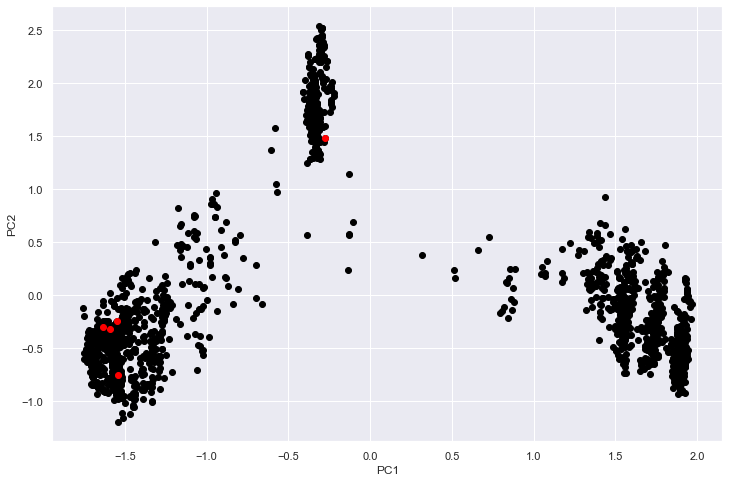

In [42]:
# Select random observation as centroids
Centroids = (df1.sample(n=5))
plt.scatter(df1["PC1"],df1["PC2"],c='black')
plt.scatter(Centroids["PC1"],Centroids["PC2"],c='red')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [43]:
#perform iterations to find the right location of centroid

K=5

diff = 1
j=0

while(diff!=0):
    XD=df1
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["PC1"]-row_d["PC1"])**2
            d2=(row_c["PC2"]-row_d["PC2"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        df1[i]=ED
        i=i+1

    C=[]
    for index,row in df1.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    df1["Clusters"]=C
    Centroids_new = df1.groupby(["Clusters"]).mean()[["PC1","PC2"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['PC1'] - Centroids['PC1']).sum() + (Centroids_new['PC2'] - Centroids['PC2']).sum()
        print(diff.sum())
    Centroids = df1.groupby(["Clusters"]).mean()[["PC1","PC2"]]

<ipython-input-43-88a71e5178dc>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-43-88a71e5178dc>:30: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0.9662122327525438
1.731836209647791
0.6634034673279237
0.40471495210986674
0.29683933528853057
0.20198678661405522
0.167546195839107
0.11063687747828282
0.10274893285901521
0.06631264735468306
0.018437863176739178
0.006824357094032618
0.00521998021610931
0.0035464939180231414
0.0034098841678821823
0.0016668215298605293
0.001748449923898443
0.012879949876273333
0.0


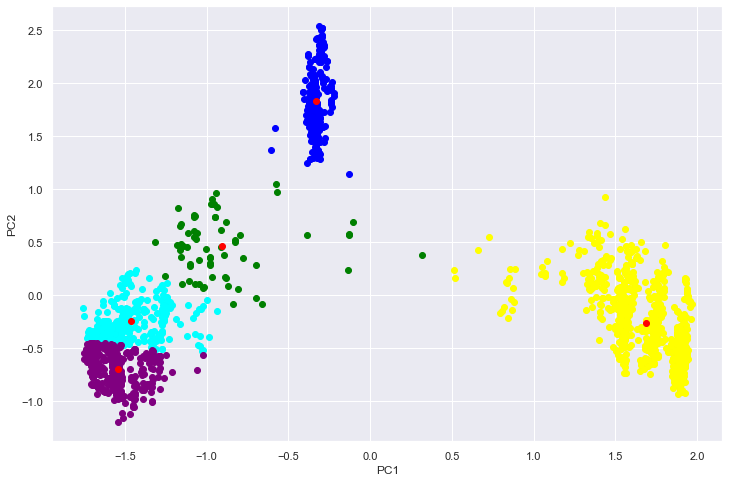

In [44]:
color=['blue','green','cyan','yellow','purple','brown','magenta','orange','pink','tan']
for k in range(10):
    data=df1[df1["Clusters"]==k+1]
    plt.scatter(data["PC1"],data["PC2"],c=color[k])
plt.scatter(Centroids["PC1"],Centroids["PC2"],c='red')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [59]:
df_cluster0 = df_new.loc[df_new['Clusters']==0]
df_cluster0['INJURY'].value_counts()

0    250
3     17
1      7
2      4
Name: INJURY, dtype: int64

In [60]:
df_cluster1 = df_new.loc[df_new['Clusters']==1]
df_cluster1['INJURY'].value_counts()

3    397
4     25
0     14
2      6
1      5
Name: INJURY, dtype: int64

In [61]:
df_cluster2 = df_new.loc[df_new['Clusters']==2]
df_cluster2['INJURY'].value_counts()

3    221
4     12
1      2
2      1
0      1
Name: INJURY, dtype: int64

### Perform Heirarchical Clustering

In [71]:
cyclists_df = df_new.drop(columns=['Clusters'])

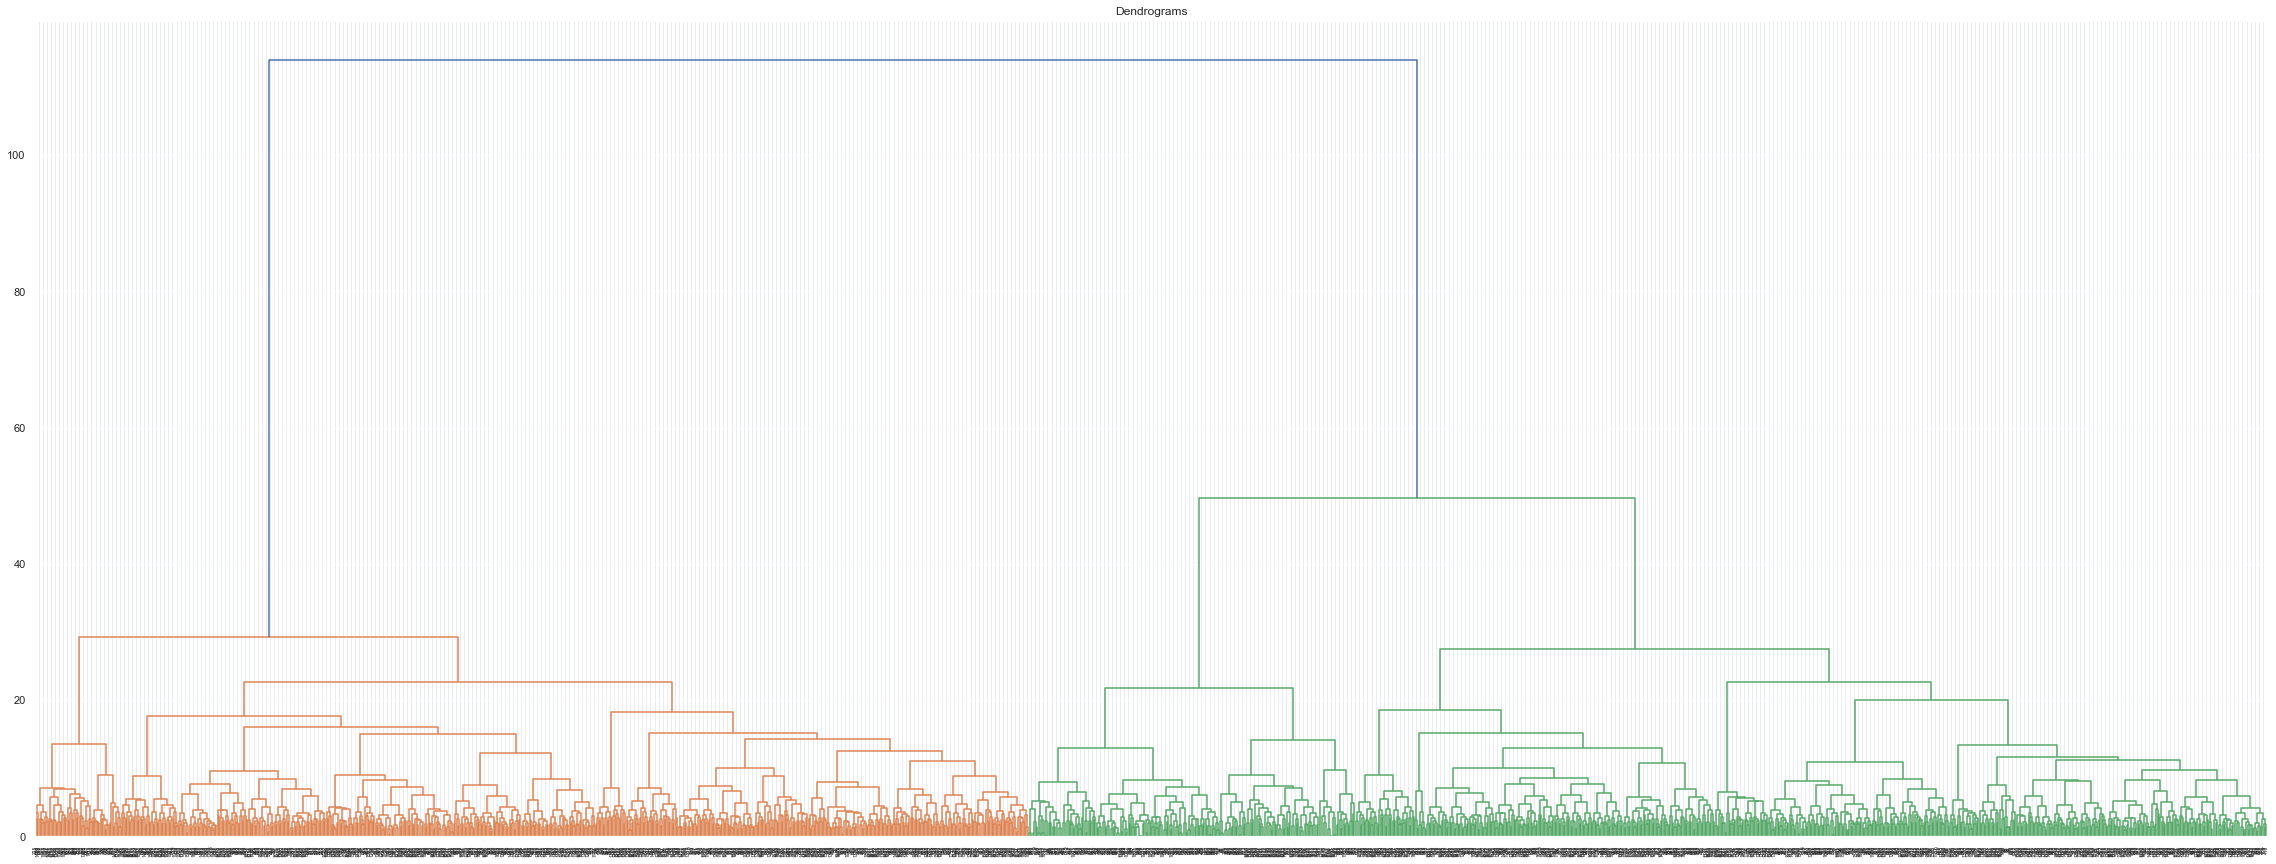

In [72]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(40, 15))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(cyclists_df, method='ward'))

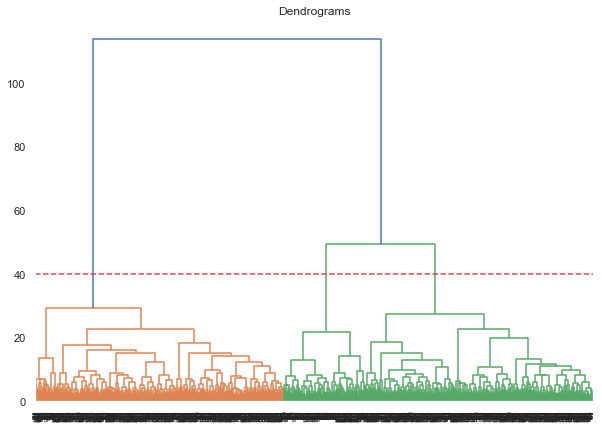

In [73]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(cyclists_df, method='ward'))
plt.axhline(y=40, color='r', linestyle='--')

In [74]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster.fit_predict(cyclists_df)

array([1, 0, 2, ..., 1, 0, 1], dtype=int64)

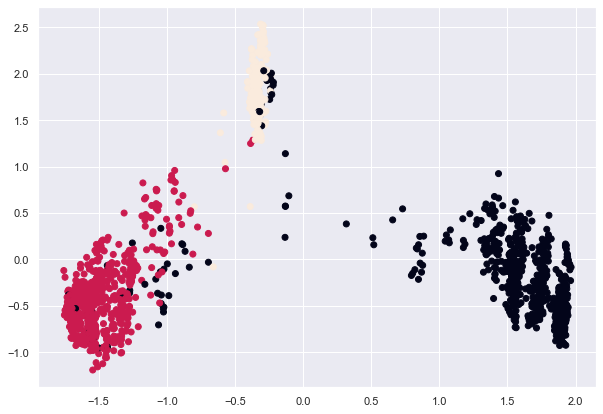

In [75]:
plt.figure(figsize=(10, 7))  
plt.scatter(cyclists_df['PC1'], cyclists_df['PC2'], c=cluster.labels_) 